```{contents}
```

# Kernels

* A **linear SVM** works well if data is linearly separable.
* But in many real-world problems, the boundary is **nonlinear**.
* **Kernel trick** lets SVM map data into a higher-dimensional feature space *without explicitly computing it*.
* This allows the SVM to learn **nonlinear decision boundaries** while still solving a linear optimization problem in that higher space.

📌 In simple words:

* **Without kernels**: Draw a straight line in 2D.
* **With kernels**: Map data to higher dimensions, then a straight line there looks like a curve back in 2D.

---

## Common Types of Kernels

### (a) Linear Kernel

$$
K(x_i, x_j) = x_i^T x_j
$$

* Just the dot product of vectors.
* No mapping, stays in the original space.
* Best when data is **linearly separable**.

📌 Example use: Text classification (high-dimensional, sparse features).

---

### (b) Polynomial Kernel

$$
K(x_i, x_j) = (x_i^T x_j + c)^d
$$

* Maps features into polynomial space of degree $d$.
* Can model curved decision boundaries.

📌 Example: Image recognition with curved boundaries.

---

### (c) Radial Basis Function (RBF / Gaussian) Kernel

$$
K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)
$$

* Measures similarity: nearby points → high similarity; far points → low similarity.
* Very flexible, can create complex nonlinear boundaries.
* **γ** controls how far the influence of each point spreads.

📌 Example: Most common kernel, used when you don’t know the structure of data.

---

### (d) Sigmoid Kernel

$$
K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)
$$

* Inspired by neural networks (acts like activation functions).
* Not as commonly used as RBF.

📌 Example: Sometimes used in shallow neural-style problems.

---

## 3. Intuition with an Example

Imagine a dataset shaped like **two concentric circles**:

* Linear SVM can’t separate them in 2D.
* Apply **RBF kernel** → maps circles into higher-dimensional space where they become linearly separable.

So the kernel gives SVM **power to handle nonlinearity**.

---

## 4. Choosing a Kernel

* **Linear** → data roughly linearly separable, or very high-dimensional sparse data.
* **Polynomial** → when interactions between features are important.
* **RBF** → default choice, works well in most cases.
* **Sigmoid** → niche, not commonly preferred.

---

**In summary:**
Kernels = mathematical functions that let SVM project data into higher dimensions **without explicitly transforming it**, enabling nonlinear decision boundaries while keeping computations efficient.


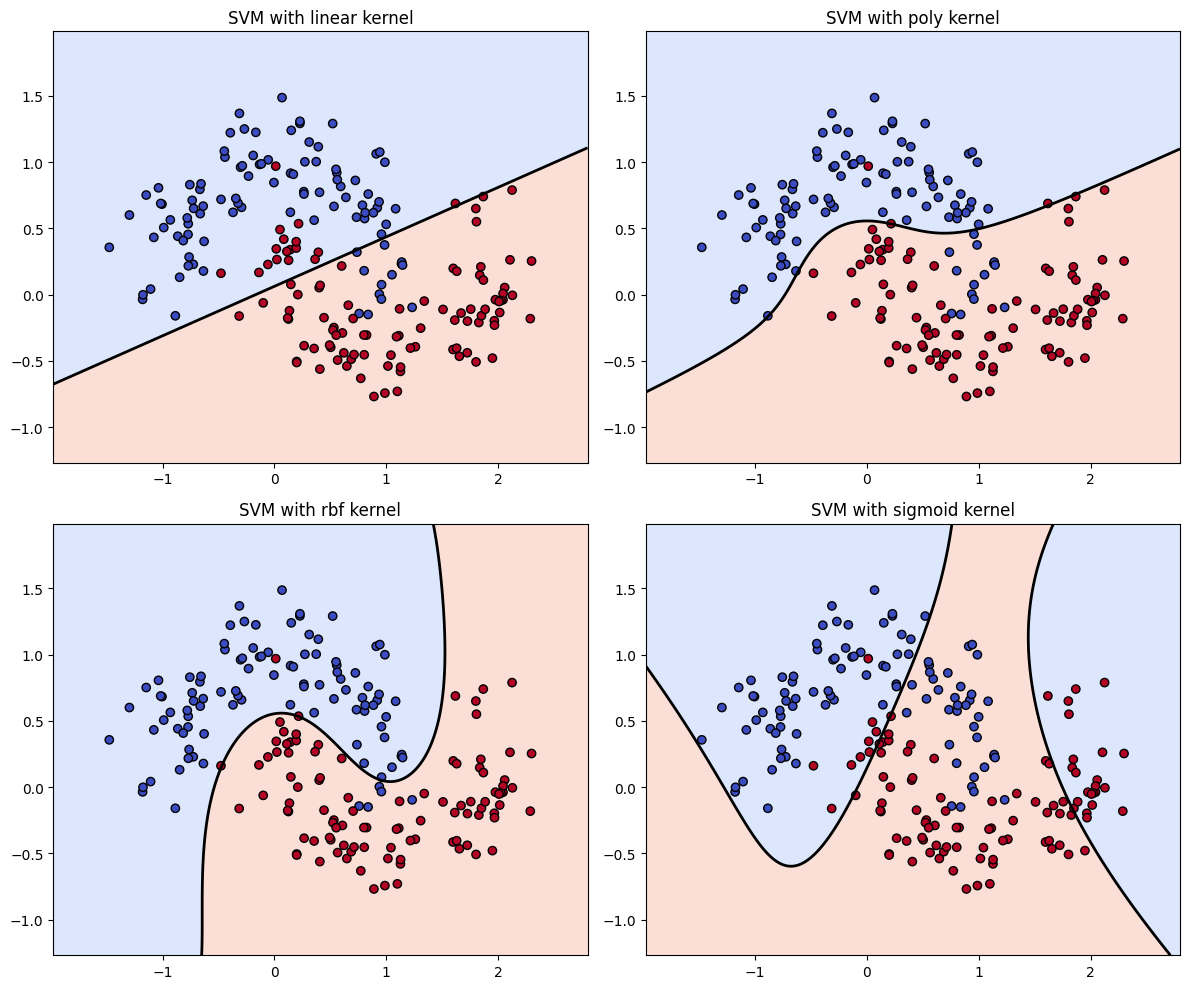

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Generate nonlinear dataset (moons)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Define kernels to compare
kernels = ["linear", "poly", "rbf", "sigmoid"]
models = [SVC(kernel=k, degree=3, gamma='scale').fit(X, y) for k in kernels]

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))

plt.figure(figsize=(12, 10))

for i, (model, kernel) in enumerate(zip(models, kernels), 1):
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM with {kernel} kernel")

plt.tight_layout()
plt.show()


### Linear SVM Geometry

* In standard SVM, the goal is to find the **maximum-margin hyperplane** that separates two classes.
* Geometrically:

  * Each data point is represented as a vector in feature space.
  * The SVM finds a line (in 2D), plane (in 3D), or hyperplane (higher dims) that splits the data with **largest margin**.

👉 Works beautifully if the data is **linearly separable**.

---

### What if the Data is Nonlinear?

Example: two concentric circles (inner circle = class A, outer circle = class B).

* In 2D, **no straight line** can separate them.
* But if you map the data into **higher dimensions**:

  * Add a new feature $z = x^2 + y^2$.
  * Now the circles become **a line in 3D space**, and a linear separator exists!

📌 Geometric trick: Make data “linearly separable” by **lifting it** into higher dimensions.

---

### Kernel Trick — Geometry

Here’s where kernels step in:

* Instead of explicitly computing the high-dimensional mapping,
* Kernels compute **dot products in that higher space directly**.

Geometrically:

* A kernel function defines a new **geometry of similarity** between points.
* Instead of “straight-line distance” in the original space, the kernel defines how “close” two points are in the transformed space.
* The SVM then finds a **linear hyperplane in that transformed space**, which corresponds to a **nonlinear boundary back in the original space**.

---

### Geometric Intuition for Common Kernels

### ✅ Linear Kernel

* Geometry: Just the usual Euclidean geometry.
* Hyperplane = straight line/plane.

---

### ✅ Polynomial Kernel

$$
K(x, x') = (x^T x' + c)^d
$$

* Geometrically: Expands the space into **all polynomial interactions** up to degree $d$.
* A straight hyperplane in this expanded space = **curved boundary** in original space.

---

### ✅ RBF (Gaussian) Kernel

$$
K(x, x') = \exp(-\gamma \|x - x'\|^2)
$$

* Geometrically: Think of each point casting a **“bump” of influence** around it.
* High γ → very tight bumps, decision boundary wiggles around data.
* Low γ → wide bumps, boundary is smoother.
* Essentially, it **reshapes the geometry of distance**: points far apart are almost orthogonal (unrelated).

---

### ✅ Sigmoid Kernel

$$
K(x, x') = \tanh(\alpha x^T x' + c)
$$

* Geometrically: Similar to mapping into a neural network activation space.
* Changes the angle/distance relationships into “S-shaped” similarity.

---

### Intuitive Analogy

Imagine the dataset as blobs of clay sitting on a flat table:

* **Linear SVM**: Try to cut the clay with a knife in one straight slice.
* **Polynomial kernel**: Bend the clay into curves and folds, then slice straight.
* **RBF kernel**: Lift the clay into hills and valleys, then slice straight.
* **Sigmoid kernel**: Pass clay through a squashing function before slicing.

So geometrically, **kernels warp the space** until a straight cut (hyperplane) becomes possible.

---

**In summary:**

* Kernels redefine geometry by **changing how we measure similarity**.
* This lets SVM carve complex boundaries by making the data *look linear in some higher-dimensional space*.

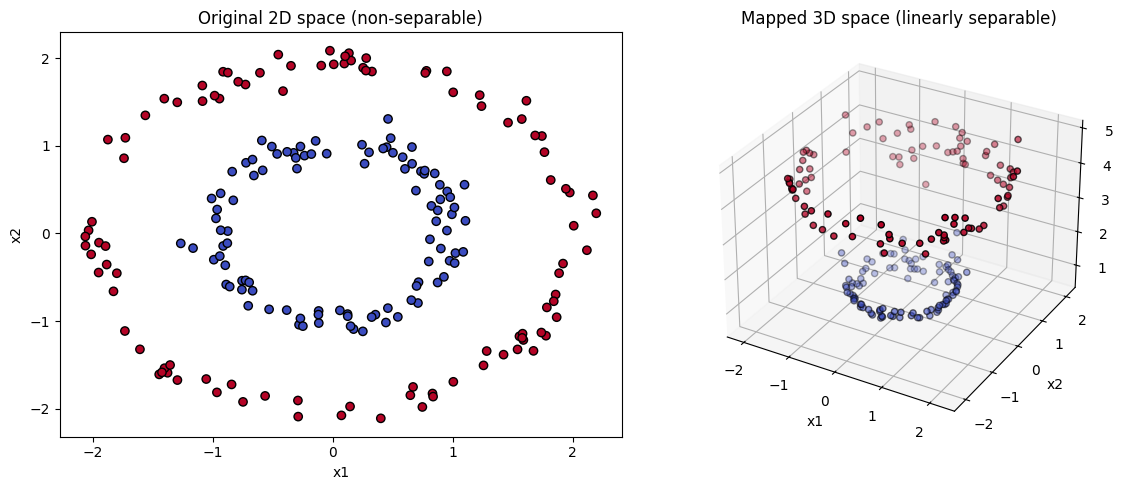

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate concentric circles dataset (nonlinear)
np.random.seed(42)
n_samples = 200
theta = 2 * np.pi * np.random.rand(n_samples)
r_inner = 1 + 0.1 * np.random.randn(n_samples//2)
r_outer = 2 + 0.1 * np.random.randn(n_samples//2)

X_inner = np.c_[r_inner * np.cos(theta[:n_samples//2]), r_inner * np.sin(theta[:n_samples//2])]
X_outer = np.c_[r_outer * np.cos(theta[n_samples//2:]), r_outer * np.sin(theta[n_samples//2:])]

X = np.vstack([X_inner, X_outer])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

# Polynomial mapping: z = x^2 + y^2
Z = np.sum(X**2, axis=1)

# ---- Plot original 2D space ----
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Original 2D space (non-separable)")
plt.xlabel("x1")
plt.ylabel("x2")

# ---- Plot transformed 3D space ----
ax = plt.subplot(1,2,2, projection='3d')
ax.scatter(X[:,0], X[:,1], Z, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_title("Mapped 3D space (linearly separable)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x1² + x2²")

plt.tight_layout()
plt.show()
